# Face Detection with Haar Cascades

It detects the face by detecting the features such as eyebrows, nose, eyes, lips, etc. And these features are calculated by 
**Delta = mean(sum dark region of an image) - mean(light region of an image)** 
Calculating for the whole image will be more computation expensive so with the help of Integral Image/Summed area table whic results in O(1) complexity. It treats an image into a series based on simple features.

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

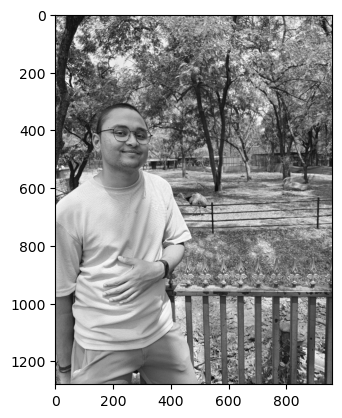

In [2]:
anurag = cv2.imread("C:/Users/Post/Downloads/photo_2024-03-17_13-59-14.jpg",0)
plt.imshow(anurag, cmap = "gray")

### Cascade file/ Face detection

In [3]:
# 6k features
face_cascade = cv2.CascadeClassifier('D:/jupyter/CV/Computer-Vision-with-Python//DATA/haarcascades/haarcascade_frontalface_default.xml')

In [4]:
# Create a function to detect face
def det_face(img):
    # create a copy of image
    face_img = img.copy()

    # detect face and store the values in a variable (height, width,etc)
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor = 1.5, minNeighbors = 7)

    # Loop throught all the coordinates and draw an rectangle
    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 0, 0), 10)

    return face_img

In [5]:
result = det_face(anurag)
result

array([[169, 194, 201, ..., 161, 188,  59],
       [216, 221, 236, ..., 197, 185, 127],
       [147, 160, 219, ..., 144, 203, 121],
       ...,
       [110, 120,  91, ...,  83,  51,  50],
       [ 89,  96,  87, ...,  84,  49,  45],
       [ 74, 108, 137, ...,  85,  49,  44]], dtype=uint8)

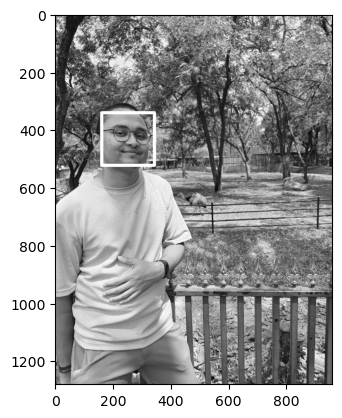

In [6]:
plt.imshow(result, cmap = "gray")

In [7]:
# Now with the video
cap = cv2.VideoCapture(0)

while True:
    # Read frame
    ret, frame = cap.read(0)
    # Detect face on a single frame
    frame = det_face(frame)
    # show frame
    cv2.imshow("My face detection project", frame)

    if cv2.waitKey(1) & 0xFf == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()